Train Score：
 0.9958246346555324
Test Score:
 0.9916666666666667

第1个测试数据
图像为：


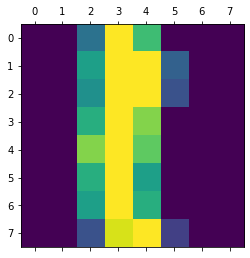

识别结果为： 1
实际值为： 1

第2个测试数据
图像为：


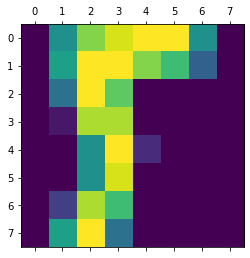

识别结果为： 5
实际值为： 5

第3个测试数据
图像为：


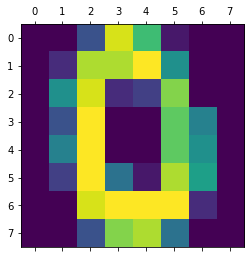

识别结果为： 0
实际值为： 0

第4个测试数据
图像为：


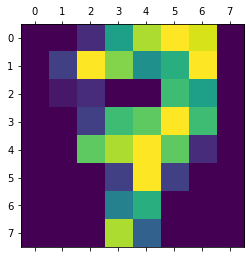

识别结果为： 7
实际值为： 7
class_weight_ [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
classes_ [0 1 2 3 4 5 6 7 8 9]
intercept_
 [-0.60974129 -0.35817331 -0.3370448  -0.53599306 -0.62038218 -0.32076925
 -0.41980228 -0.32741913 -0.34066812  0.42802252  0.48641298  0.09057154
  0.34862853  0.49583321  0.15005204  0.61666948  0.44673778  0.14798082
 -0.12728576 -0.01634455  0.16378511 -0.00519837  0.20093504  0.05304571
 -0.27525132 -0.07591399  0.03702666 -0.13370608 -0.01164667  0.03539593
  0.2669467   0.49877404  0.11821526  0.23895288  0.10612412  0.32635818
 -0.10147992  0.20735046 -0.32057528 -0.17512989 -0.13084603 -0.17865321
  0.25312189  0.00379676 -0.2007705 ]
fit_status_ 0
n_support_ [39 79 58 64 58 68 45 62 95 83]
shape_fit_ (1437, 64)


In [2]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.preprocessing import MinMaxScaler  
from sklearn.model_selection import train_test_split
# 导入数字图像数据集
digits = load_digits()
data = digits.data
target = digits.target
images = digits.images
# 划分数据集
X_train, X_test, Y_train, Y_test = train_test_split(
    data,
    target,
    test_size=0.2,
    random_state=1
)
# 在对数据预处理前，先保存下测试集的数字图像和实际值
test_images = X_test.reshape(360, 8, 8)
# 归一化
MMS = MinMaxScaler()
MMS.fit(X_train)
X_train = MMS.transform(X_train)
X_test = MMS.transform(X_test)

# 创建模型
model = SVC(kernel="rbf")

# 训练模型
model.fit(X_train, Y_train)
# 评分
print("Train Score：\n", model.score(X_train, Y_train))
print("Test Score:\n", model.score(X_test, Y_test))
# 测试
for i in range(4):
    print("\n第%d个测试数据" % (i + 1))
    print("图像为：")
    plt.matshow(test_images[i])
    plt.show()
    print("识别结果为：", model.predict(X_test[i].reshape(1, -1))[0])
    print("实际值为：", Y_test[i])

print("class_weight_", model.class_weight_)
print("classes_", model.classes_)
#print("coef_", model.coef_)    # coef_是线性核函数的参数
print("intercept_\n", model.intercept_)
print("fit_status_", model.fit_status_)
#print("support_", model.support_)
#print("support_vectors_", model.support_vectors_)
print("n_support_", model.n_support_)
print("shape_fit_", model.shape_fit_)